In [ ]:
!pip install statsmodels --upgrade

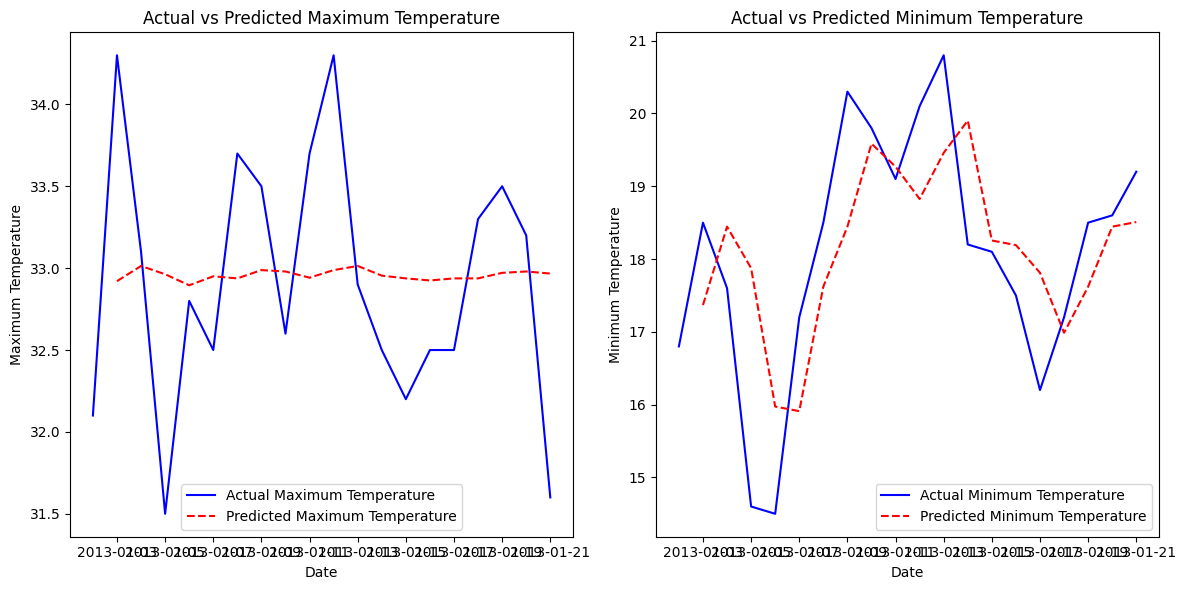

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg

# Load your CSV file
file_path = '/content/Samplecsvdatafile.csv'
df = pd.read_csv(file_path)

# Clean the data
df.columns = ['date', 'maximum_temperature', 'minimum_temperature', 'unnamed1', 'unnamed2']
df = df[['date', 'maximum_temperature', 'minimum_temperature']]
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

# Extract the first 20 days of data
df_first_20 = df.iloc[:20]

# Create Auto Regression (AR) models to predict temperatures

# For maximum temperature
model_max_temp = AutoReg(df_first_20['maximum_temperature'], lags=1)
model_fit_max = model_max_temp.fit()
predictions_max_temp = model_fit_max.predict(start=0, end=19)

# For minimum temperature
model_min_temp = AutoReg(df_first_20['minimum_temperature'], lags=1)
model_fit_min = model_min_temp.fit()
predictions_min_temp = model_fit_min.predict(start=0, end=19)

# Actual values
actual_max_temp = df_first_20['maximum_temperature']
actual_min_temp = df_first_20['minimum_temperature']

# Plot the actual and predicted temperatures
plt.figure(figsize=(12, 6))

# Plot for maximum temperature
plt.subplot(1, 2, 1)
plt.plot(df_first_20['date'], actual_max_temp, label='Actual Maximum Temperature', color='blue')
plt.plot(df_first_20['date'], predictions_max_temp, label='Predicted Maximum Temperature', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Maximum Temperature')
plt.title('Actual vs Predicted Maximum Temperature')
plt.legend()

# Plot for minimum temperature
plt.subplot(1, 2, 2)
plt.plot(df_first_20['date'], actual_min_temp, label='Actual Minimum Temperature', color='blue')
plt.plot(df_first_20['date'], predictions_min_temp, label='Predicted Minimum Temperature', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Minimum Temperature')
plt.title('Actual vs Predicted Minimum Temperature')
plt.legend()

plt.tight_layout()
plt.show()


 As we can see, the AR model was not so efficient when it came to predicting
fluctuating values.

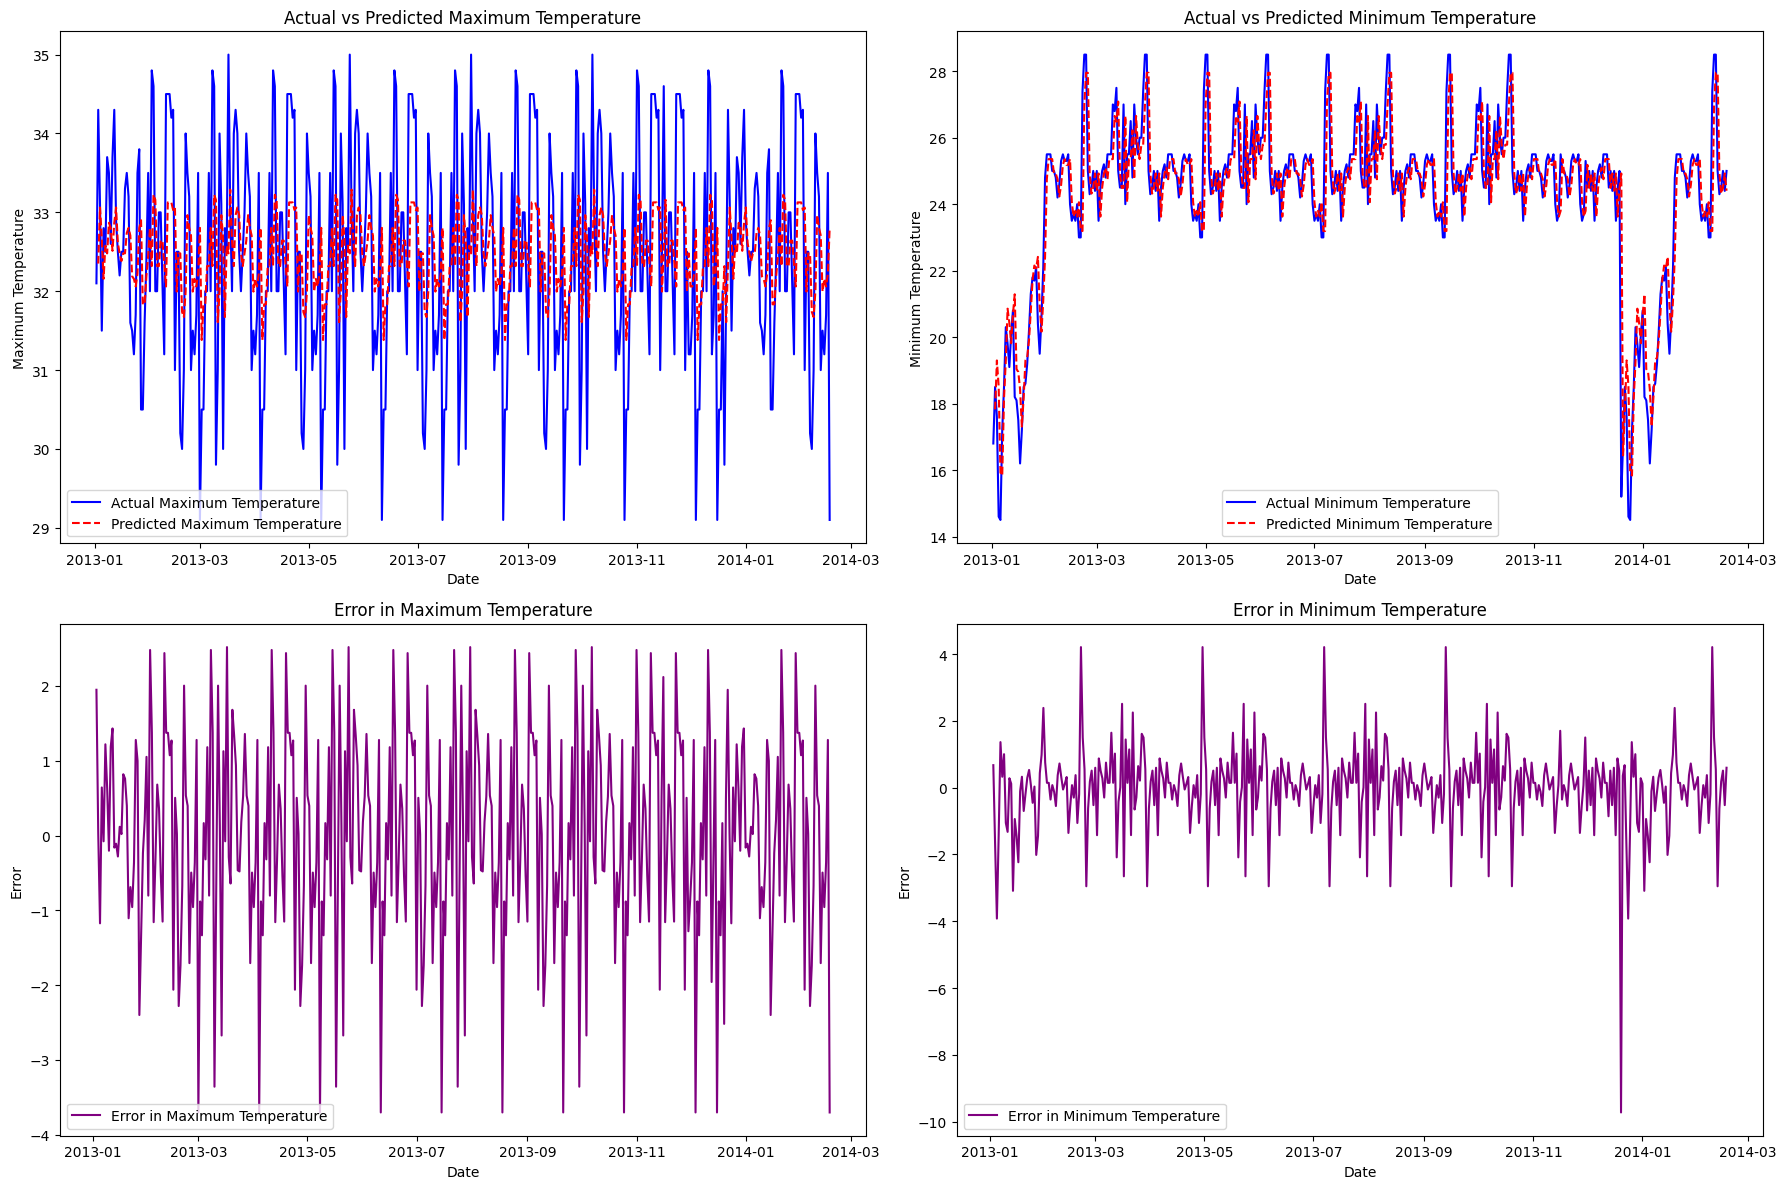

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg

# Load your CSV file
file_path = '/content/Samplecsvdatafile.csv'
df = pd.read_csv(file_path)

# Clean the data
df.columns = ['date', 'maximum_temperature', 'minimum_temperature', 'unnamed1', 'unnamed2']
df = df[['date', 'maximum_temperature', 'minimum_temperature']]
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

# Use all the data available in the CSV
df_all = df

# Create Auto Regression (AR) models to predict temperatures

# For maximum temperature
model_max_temp = AutoReg(df_all['maximum_temperature'], lags=1)
model_fit_max = model_max_temp.fit()
predictions_max_temp = model_fit_max.predict(start=0, end=len(df_all)-1)

# For minimum temperature
model_min_temp = AutoReg(df_all['minimum_temperature'], lags=1)
model_fit_min = model_min_temp.fit()
predictions_min_temp = model_fit_min.predict(start=0, end=len(df_all)-1)

# Actual values
actual_max_temp = df_all['maximum_temperature']
actual_min_temp = df_all['minimum_temperature']

# Calculate the errors
error_max_temp = actual_max_temp - predictions_max_temp
error_min_temp = actual_min_temp - predictions_min_temp

# Plot the actual and predicted temperatures and errors
plt.figure(figsize=(18, 12))

# Plot for maximum temperature
plt.subplot(2, 2, 1)
plt.plot(df_all['date'], actual_max_temp, label='Actual Maximum Temperature', color='blue')
plt.plot(df_all['date'], predictions_max_temp, label='Predicted Maximum Temperature', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Maximum Temperature')
plt.title('Actual vs Predicted Maximum Temperature')
plt.legend()

# Plot for minimum temperature
plt.subplot(2, 2, 2)
plt.plot(df_all['date'], actual_min_temp, label='Actual Minimum Temperature', color='blue')
plt.plot(df_all['date'], predictions_min_temp, label='Predicted Minimum Temperature', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Minimum Temperature')
plt.title('Actual vs Predicted Minimum Temperature')
plt.legend()

# Plot for maximum temperature error
plt.subplot(2, 2, 3)
plt.plot(df_all['date'], error_max_temp, label='Error in Maximum Temperature', color='purple')
plt.xlabel('Date')
plt.ylabel('Error')
plt.title('Error in Maximum Temperature')
plt.legend()

# Plot for minimum temperature error
plt.subplot(2, 2, 4)
plt.plot(df_all['date'], error_min_temp, label='Error in Minimum Temperature', color='purple')
plt.xlabel('Date')
plt.ylabel('Error')
plt.title('Error in Minimum Temperature')
plt.legend()

plt.tight_layout()
plt.show()


For a large stationary dataset, we can see the prediction is way better for an AR model

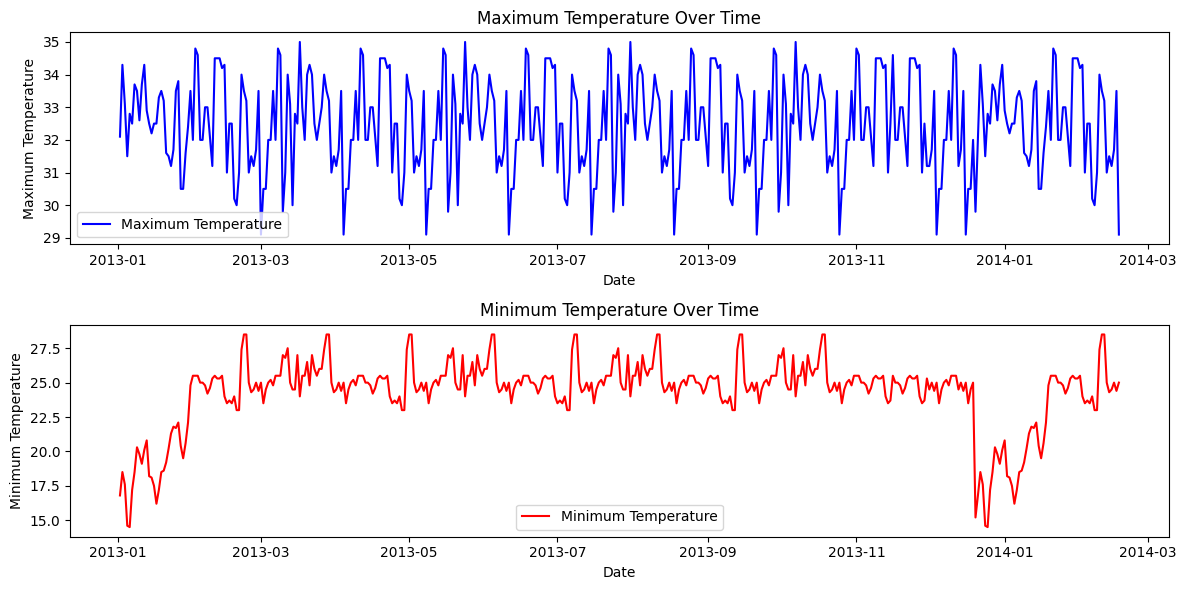

Maximum Temperature ADF Test:
ADF Statistic: -8.053658741884908
p-value: 1.7152914953543401e-12
Critical Value (1%): -3.4470566389664703
Critical Value (5%): -2.8689037160476016
Critical Value (10%): -2.570692663557422

Minimum Temperature ADF Test:
ADF Statistic: -3.9976570707263908
p-value: 0.0014228293288347132
Critical Value (1%): -3.447099431978147
Critical Value (5%): -2.8689225261604263
Critical Value (10%): -2.57070269105012


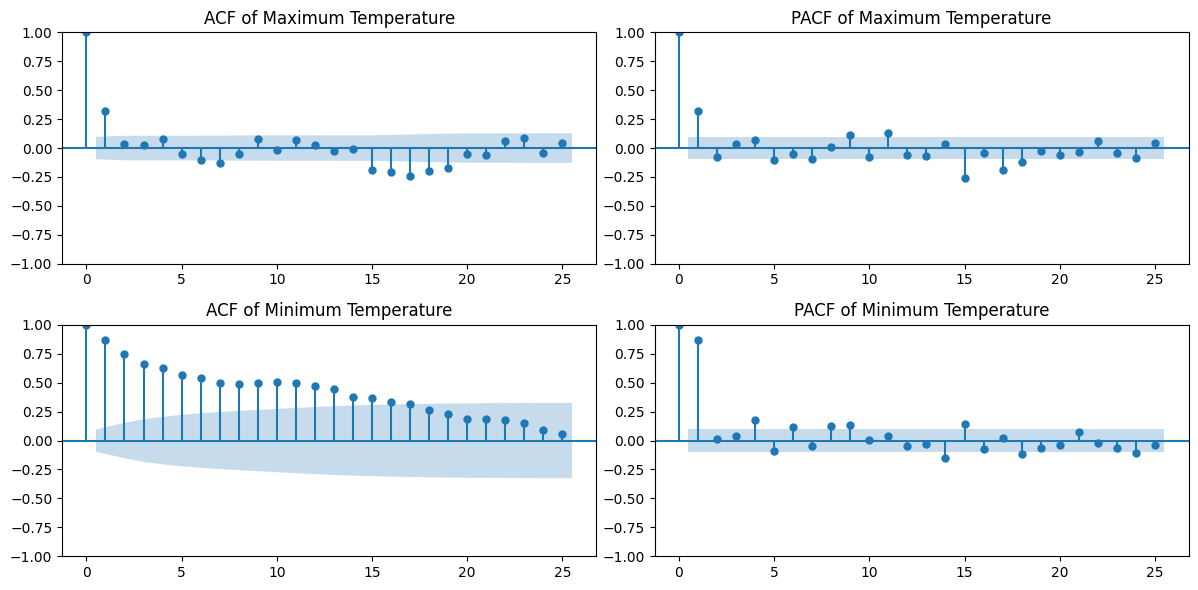

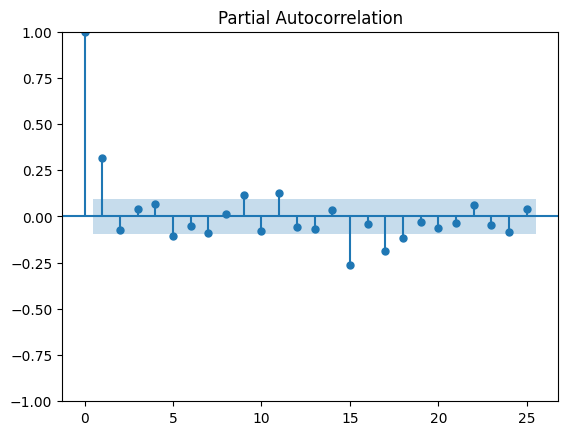

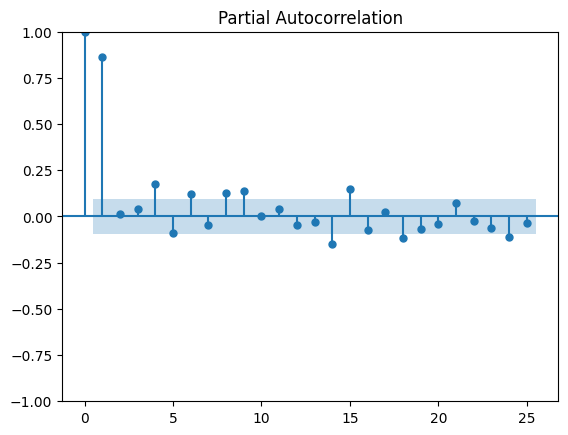

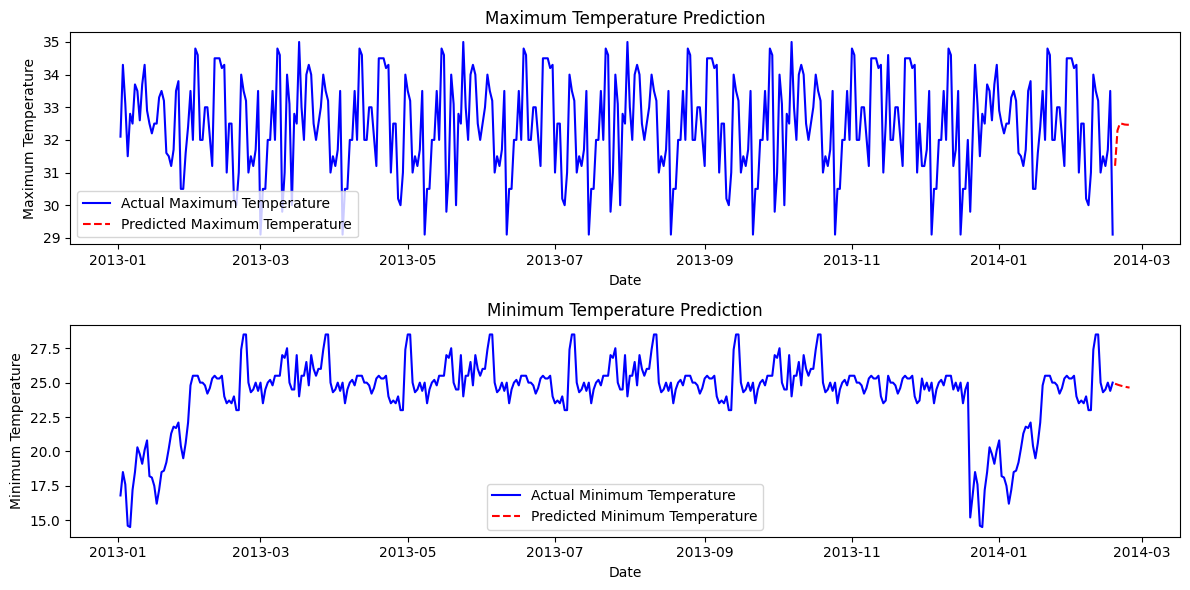

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg

# Load the CSV file
file_path = '/content/Samplecsvdatafile.csv'
df = pd.read_csv(file_path)

# Clean the data
df.columns = ['date', 'maximum_temperature', 'minimum_temperature', 'unnamed1', 'unnamed2']
df = df[['date', 'maximum_temperature', 'minimum_temperature']]
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

# Plot maximum and minimum temperature graphs
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(df['date'], df['maximum_temperature'], label='Maximum Temperature', color='blue')
plt.xlabel('Date')
plt.ylabel('Maximum Temperature')
plt.title('Maximum Temperature Over Time')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(df['date'], df['minimum_temperature'], label='Minimum Temperature', color='red')
plt.xlabel('Date')
plt.ylabel('Minimum Temperature')
plt.title('Minimum Temperature Over Time')
plt.legend()

plt.tight_layout()
plt.show()

# Check for stationarity using the Augmented Dickey-Fuller test
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    for key, value in result[4].items():
        print('Critical Value ({}): {}'.format(key, value))

print('Maximum Temperature ADF Test:')
adf_test(df['maximum_temperature'])
print('\nMinimum Temperature ADF Test:')
adf_test(df['minimum_temperature'])

# Plot PACF and ACF graphs of the first 25 lags
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plot_acf(df['maximum_temperature'], lags=25, ax=plt.gca(), title='ACF of Maximum Temperature')

plt.subplot(2, 2, 2)
plot_pacf(df['maximum_temperature'], lags=25, ax=plt.gca(), title='PACF of Maximum Temperature')

plt.subplot(2, 2, 3)
plot_acf(df['minimum_temperature'], lags=25, ax=plt.gca(), title='ACF of Minimum Temperature')

plt.subplot(2, 2, 4)
plot_pacf(df['minimum_temperature'], lags=25, ax=plt.gca(), title='PACF of Minimum Temperature')

plt.tight_layout()
plt.show()

# Determine the order of the AR model
# For simplicity, we can use the first significant lag in PACF as the order
max_temp_pacf = plot_pacf(df['maximum_temperature'], lags=25)
min_temp_pacf = plot_pacf(df['minimum_temperature'], lags=25)

# Assuming the order determined is 2 for both (based on significant lags)
order = 2

# Fit the AR model and predict the next 7 days
# For maximum temperature
model_max_temp = AutoReg(df['maximum_temperature'], lags=order)
model_fit_max = model_max_temp.fit()
predictions_max_temp = model_fit_max.predict(start=len(df), end=len(df)+6)

# For minimum temperature
model_min_temp = AutoReg(df['minimum_temperature'], lags=order)
model_fit_min = model_min_temp.fit()
predictions_min_temp = model_fit_min.predict(start=len(df), end=len(df)+6)

# Create a date range for the predictions
future_dates = pd.date_range(start=df['date'].iloc[-1] + pd.Timedelta(days=1), periods=7)

# Plot the predictions
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(df['date'], df['maximum_temperature'], label='Actual Maximum Temperature', color='blue')
plt.plot(future_dates, predictions_max_temp, label='Predicted Maximum Temperature', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Maximum Temperature')
plt.title('Maximum Temperature Prediction')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(df['date'], df['minimum_temperature'], label='Actual Minimum Temperature', color='blue')
plt.plot(future_dates, predictions_min_temp, label='Predicted Minimum Temperature', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Minimum Temperature')
plt.title('Minimum Temperature Prediction')
plt.legend()

plt.tight_layout()
plt.show()


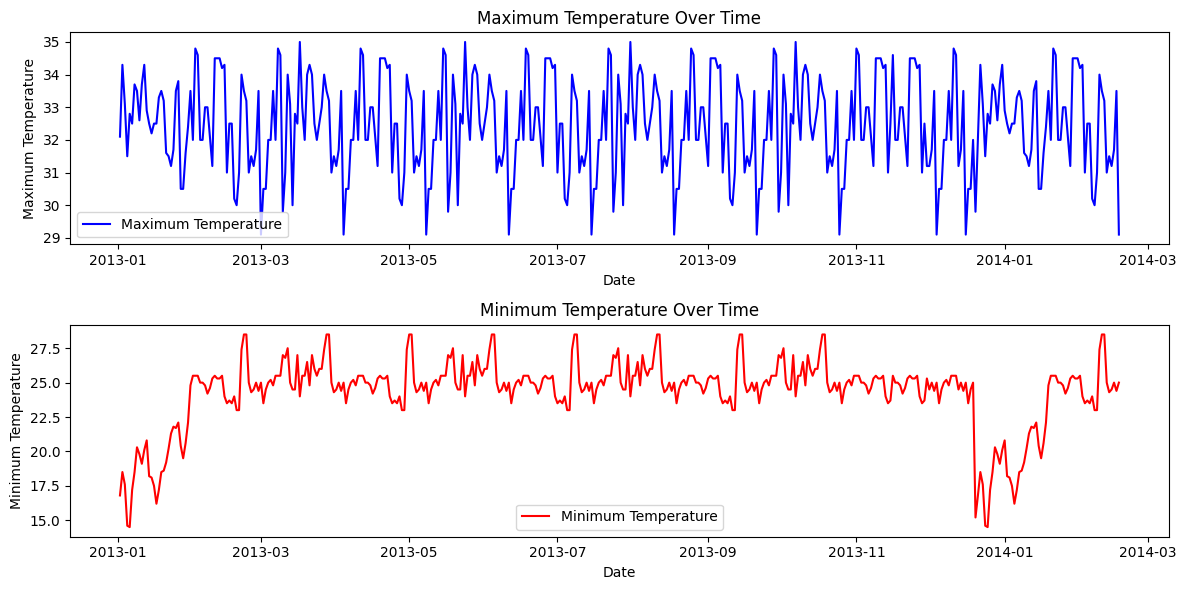

Maximum Temperature ADF Test:
ADF Statistic: -8.053658741884908
p-value: 1.7152914953543401e-12
Critical Value (1%): -3.4470566389664703
Critical Value (5%): -2.8689037160476016
Critical Value (10%): -2.570692663557422

Minimum Temperature ADF Test:
ADF Statistic: -3.9976570707263908
p-value: 0.0014228293288347132
Critical Value (1%): -3.447099431978147
Critical Value (5%): -2.8689225261604263
Critical Value (10%): -2.57070269105012


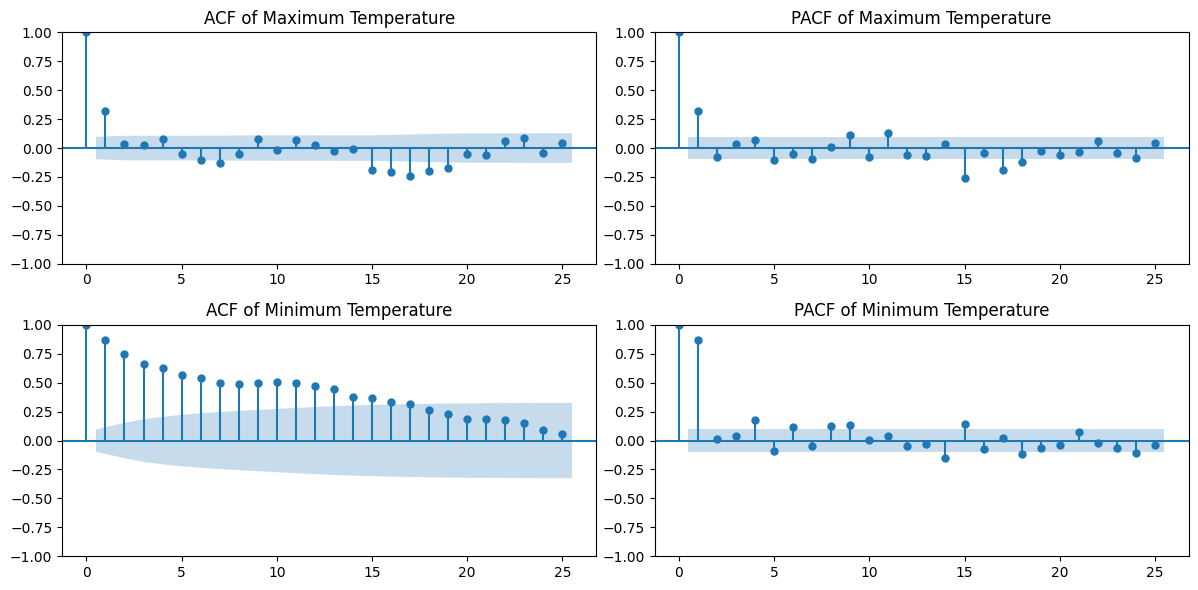

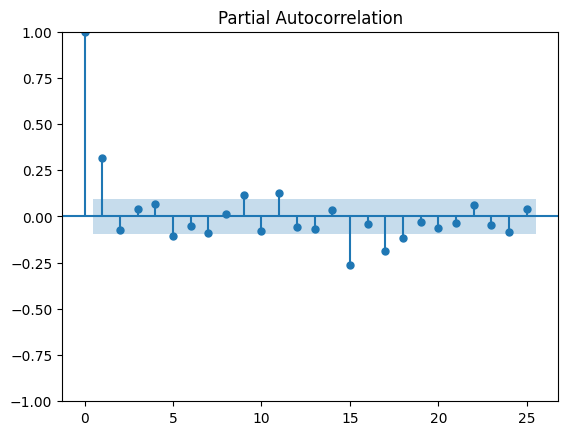

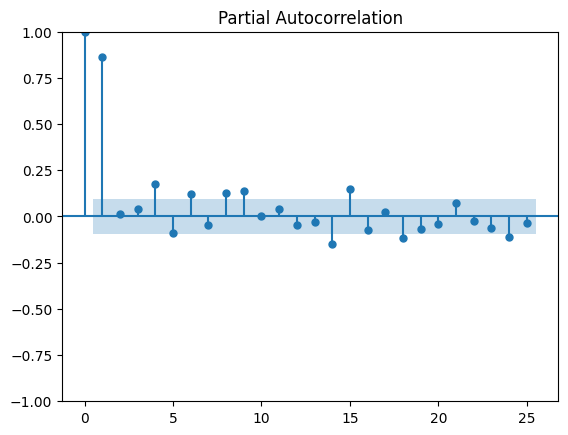

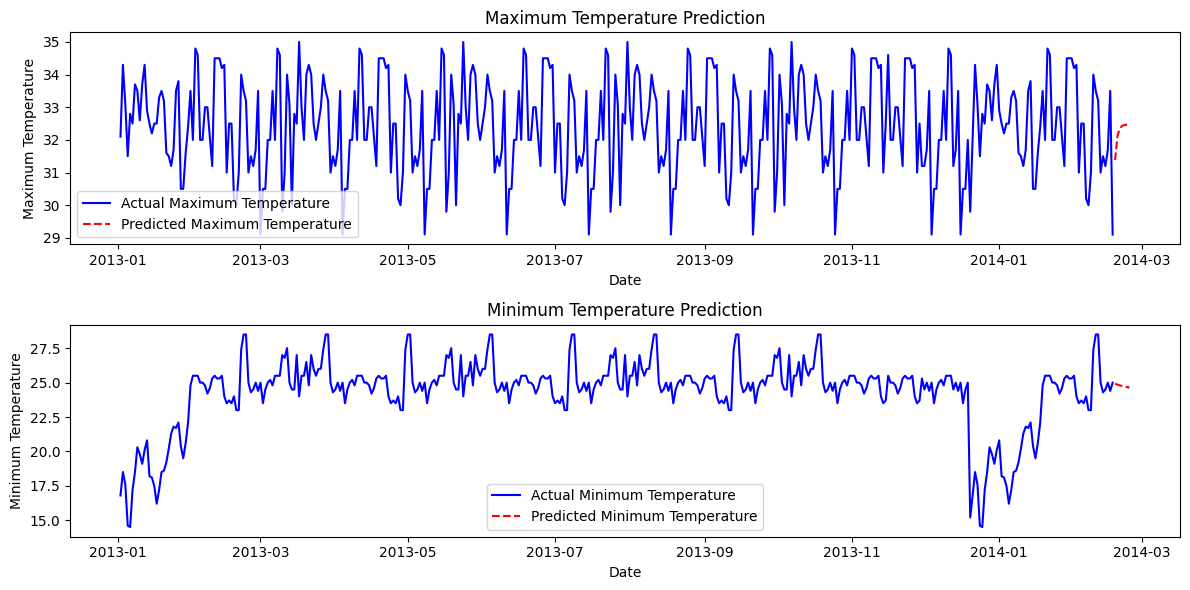

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg

# Load the CSV file
file_path = '/content/Samplecsvdatafile.csv'
df = pd.read_csv(file_path)

# Clean the data
df.columns = ['date', 'maximum_temperature', 'minimum_temperature', 'unnamed1', 'unnamed2']
df = df[['date', 'maximum_temperature', 'minimum_temperature']]
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

# Plot maximum and minimum temperature graphs
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(df['date'], df['maximum_temperature'], label='Maximum Temperature', color='blue')
plt.xlabel('Date')
plt.ylabel('Maximum Temperature')
plt.title('Maximum Temperature Over Time')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(df['date'], df['minimum_temperature'], label='Minimum Temperature', color='red')
plt.xlabel('Date')
plt.ylabel('Minimum Temperature')
plt.title('Minimum Temperature Over Time')
plt.legend()

plt.tight_layout()
plt.show()

# Check for stationarity using the Augmented Dickey-Fuller test
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    for key, value in result[4].items():
        print('Critical Value ({}): {}'.format(key, value))

print('Maximum Temperature ADF Test:')
adf_test(df['maximum_temperature'])
print('\nMinimum Temperature ADF Test:')
adf_test(df['minimum_temperature'])

# Plot PACF and ACF graphs of the first 25 lags
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plot_acf(df['maximum_temperature'], lags=25, ax=plt.gca(), title='ACF of Maximum Temperature')

plt.subplot(2, 2, 2)
plot_pacf(df['maximum_temperature'], lags=25, ax=plt.gca(), title='PACF of Maximum Temperature')

plt.subplot(2, 2, 3)
plot_acf(df['minimum_temperature'], lags=25, ax=plt.gca(), title='ACF of Minimum Temperature')

plt.subplot(2, 2, 4)
plot_pacf(df['minimum_temperature'], lags=25, ax=plt.gca(), title='PACF of Minimum Temperature')

plt.tight_layout()
plt.show()

# Determine the order of the AR model
# For simplicity, we can use the first significant lag in PACF as the order
max_temp_pacf = plot_pacf(df['maximum_temperature'], lags=25)
min_temp_pacf = plot_pacf(df['minimum_temperature'], lags=25)

# Assuming the order determined is 1 for both (based on significant lags)
order = 1

# Fit the AR model and predict the next 7 days
# For maximum temperature
model_max_temp = AutoReg(df['maximum_temperature'], lags=order)
model_fit_max = model_max_temp.fit()
predictions_max_temp = model_fit_max.predict(start=len(df), end=len(df)+6)

# For minimum temperature
model_min_temp = AutoReg(df['minimum_temperature'], lags=order)
model_fit_min = model_min_temp.fit()
predictions_min_temp = model_fit_min.predict(start=len(df), end=len(df)+6)

# Create a date range for the predictions
future_dates = pd.date_range(start=df['date'].iloc[-1] + pd.Timedelta(days=1), periods=7)

# Plot the predictions
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(df['date'], df['maximum_temperature'], label='Actual Maximum Temperature', color='blue')
plt.plot(future_dates, predictions_max_temp, label='Predicted Maximum Temperature', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Maximum Temperature')
plt.title('Maximum Temperature Prediction')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(df['date'], df['minimum_temperature'], label='Actual Minimum Temperature', color='blue')
plt.plot(future_dates, predictions_min_temp, label='Predicted Minimum Temperature', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Minimum Temperature')
plt.title('Minimum Temperature Prediction')
plt.legend()

plt.tight_layout()
plt.show()


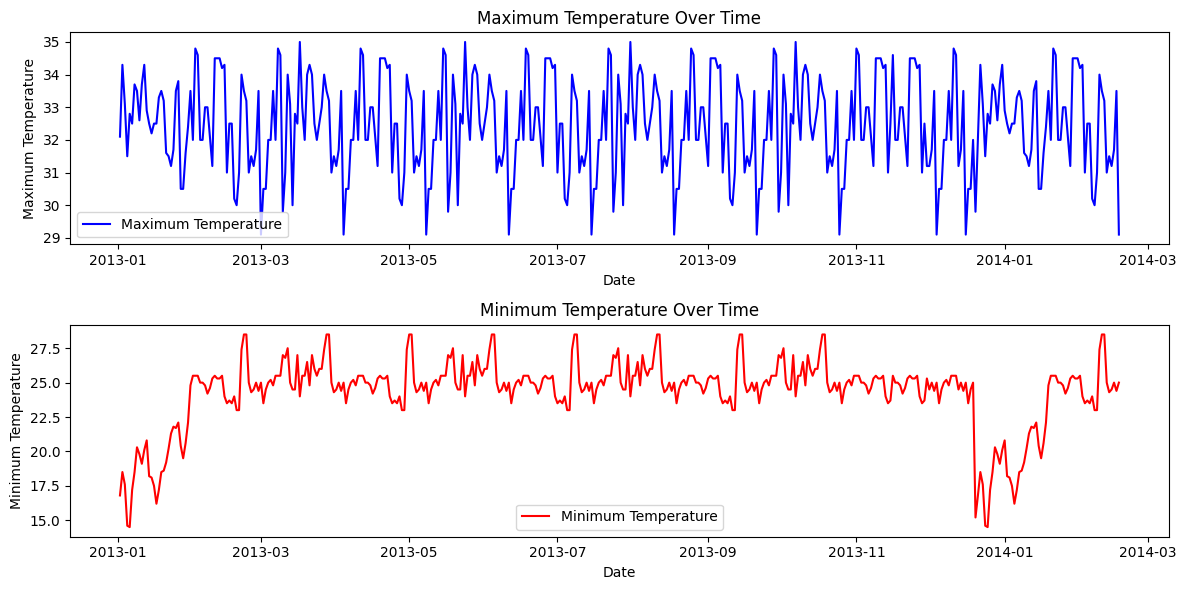

Maximum Temperature ADF Test:
ADF Statistic: -8.053658741884908
p-value: 1.7152914953543401e-12
Critical Value (1%): -3.4470566389664703
Critical Value (5%): -2.8689037160476016
Critical Value (10%): -2.570692663557422

Minimum Temperature ADF Test:
ADF Statistic: -3.9976570707263908
p-value: 0.0014228293288347132
Critical Value (1%): -3.447099431978147
Critical Value (5%): -2.8689225261604263
Critical Value (10%): -2.57070269105012


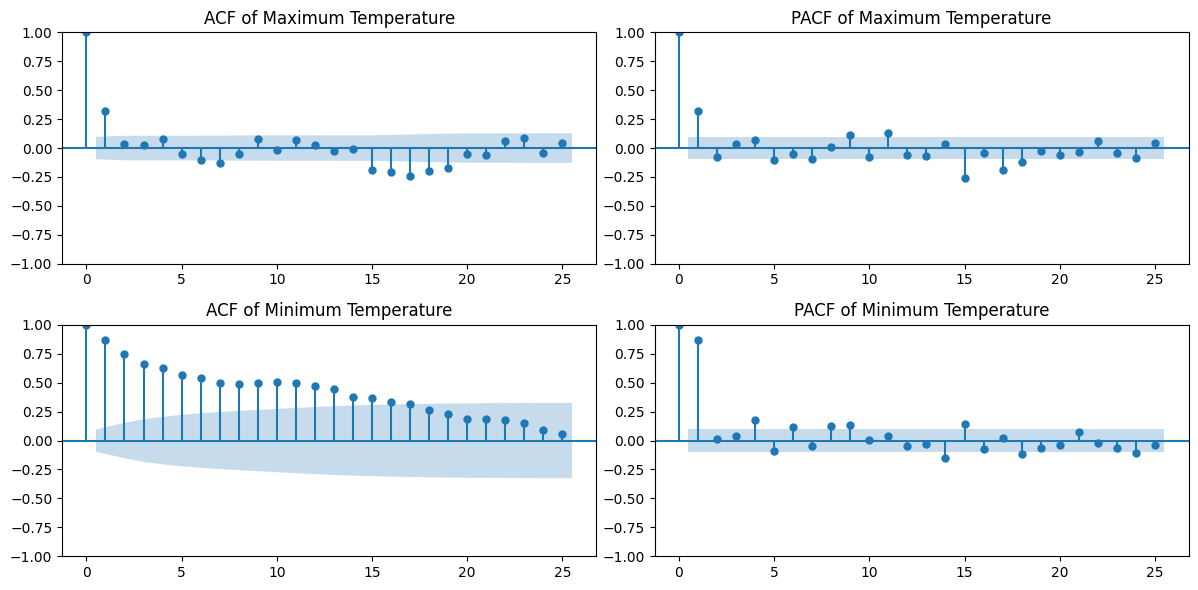

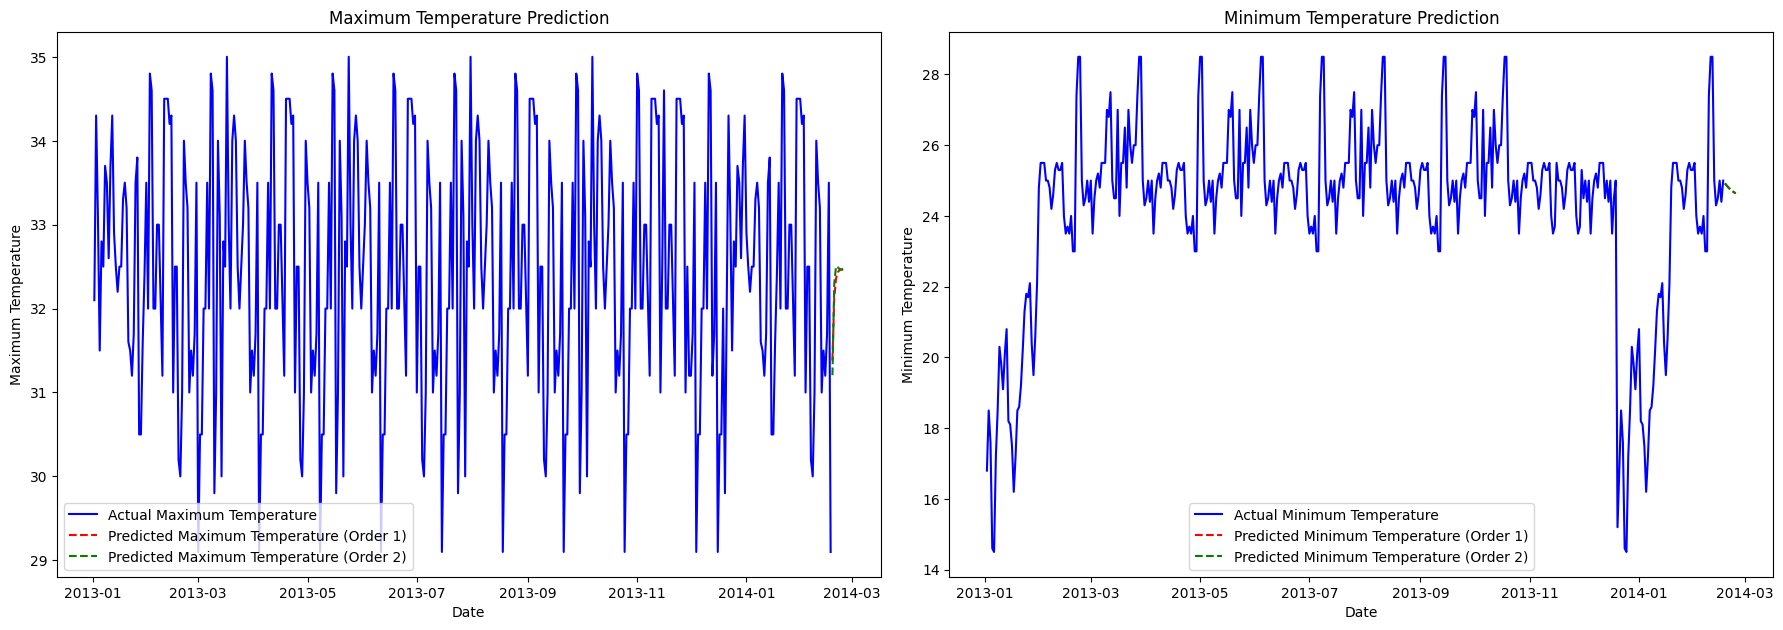

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg

# Load the CSV file
file_path = '/content/Samplecsvdatafile.csv'
df = pd.read_csv(file_path)

# Clean the data
df.columns = ['date', 'maximum_temperature', 'minimum_temperature', 'unnamed1', 'unnamed2']
df = df[['date', 'maximum_temperature', 'minimum_temperature']]
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

# Plot maximum and minimum temperature graphs
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(df['date'], df['maximum_temperature'], label='Maximum Temperature', color='blue')
plt.xlabel('Date')
plt.ylabel('Maximum Temperature')
plt.title('Maximum Temperature Over Time')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(df['date'], df['minimum_temperature'], label='Minimum Temperature', color='red')
plt.xlabel('Date')
plt.ylabel('Minimum Temperature')
plt.title('Minimum Temperature Over Time')
plt.legend()

plt.tight_layout()
plt.show()

# Check for stationarity using the Augmented Dickey-Fuller test
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    for key, value in result[4].items():
        print('Critical Value ({}): {}'.format(key, value))

print('Maximum Temperature ADF Test:')
adf_test(df['maximum_temperature'])
print('\nMinimum Temperature ADF Test:')
adf_test(df['minimum_temperature'])

# Plot PACF and ACF graphs of the first 25 lags
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plot_acf(df['maximum_temperature'], lags=25, ax=plt.gca(), title='ACF of Maximum Temperature')

plt.subplot(2, 2, 2)
plot_pacf(df['maximum_temperature'], lags=25, ax=plt.gca(), title='PACF of Maximum Temperature')

plt.subplot(2, 2, 3)
plot_acf(df['minimum_temperature'], lags=25, ax=plt.gca(), title='ACF of Minimum Temperature')

plt.subplot(2, 2, 4)
plot_pacf(df['minimum_temperature'], lags=25, ax=plt.gca(), title='PACF of Minimum Temperature')

plt.tight_layout()
plt.show()

# Determine the order of the AR model
order1 = 1
order2 = 2

# Fit the AR models and predict the next 7 days
# For maximum temperature with order 1
model_max_temp_1 = AutoReg(df['maximum_temperature'], lags=order1)
model_fit_max_1 = model_max_temp_1.fit()
predictions_max_temp_1 = model_fit_max_1.predict(start=len(df), end=len(df)+6)

# For minimum temperature with order 1
model_min_temp_1 = AutoReg(df['minimum_temperature'], lags=order1)
model_fit_min_1 = model_min_temp_1.fit()
predictions_min_temp_1 = model_fit_min_1.predict(start=len(df), end=len(df)+6)

# For maximum temperature with order 2
model_max_temp_2 = AutoReg(df['maximum_temperature'], lags=order2)
model_fit_max_2 = model_max_temp_2.fit()
predictions_max_temp_2 = model_fit_max_2.predict(start=len(df), end=len(df)+6)

# For minimum temperature with order 2
model_min_temp_2 = AutoReg(df['minimum_temperature'], lags=order2)
model_fit_min_2 = model_min_temp_2.fit()
predictions_min_temp_2 = model_fit_min_2.predict(start=len(df), end=len(df)+6)

# Create a date range for the predictions
future_dates = pd.date_range(start=df['date'].iloc[-1] + pd.Timedelta(days=1), periods=7)

# Plot the predictions
plt.figure(figsize=(18, 12))

# Plot for maximum temperature
plt.subplot(2, 2, 1)
plt.plot(df['date'], df['maximum_temperature'], label='Actual Maximum Temperature', color='blue')
plt.plot(future_dates, predictions_max_temp_1, label='Predicted Maximum Temperature (Order 1)', color='red', linestyle='--')
plt.plot(future_dates, predictions_max_temp_2, label='Predicted Maximum Temperature (Order 2)', color='green', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Maximum Temperature')
plt.title('Maximum Temperature Prediction')
plt.legend()

# Plot for minimum temperature
plt.subplot(2, 2, 2)
plt.plot(df['date'], df['minimum_temperature'], label='Actual Minimum Temperature', color='blue')
plt.plot(future_dates, predictions_min_temp_1, label='Predicted Minimum Temperature (Order 1)', color='red', linestyle='--')
plt.plot(future_dates, predictions_min_temp_2, label='Predicted Minimum Temperature (Order 2)', color='green', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Minimum Temperature')
plt.title('Minimum Temperature Prediction')
plt.legend()

plt.tight_layout()
plt.show()


ARIMA

In [ ]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

# Load the CSV file
file_path = '/content/Samplecsvdatafile.csv'
df = pd.read_csv(file_path)

# Clean the data
df.columns = ['date', 'maximum_temperature', 'minimum_temperature', 'unnamed1', 'unnamed2']
df = df[['date', 'maximum_temperature', 'minimum_temperature']]
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

# Use only the maximum_temperature for ARIMA model
data = df['maximum_temperature']

# Split the data into training and testing sets
train_data, test_data = data[:-100], data[-100:]


# Plot ACF and PACF
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plot_acf(train_data, lags=25, ax=plt.gca(), title='ACF of Maximum Temperature')

plt.subplot(2, 1, 2)
plot_pacf(train_data, lags=25, ax=plt.gca(), title='PACF of Maximum Temperature')

plt.tight_layout()
plt.show()

# Check for stationarity using the Augmented Dickey-Fuller test
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    for key, value in result[4].items():
        print('Critical Value ({}): {}'.format(key, value))

print('Maximum Temperature ADF Test:')
adf_test(train_data)

# Determine the optimal order for ARIMA model
stepwise_fit = auto_arima(train_data, start_p=1, start_q=1,
                          max_p=3, max_q=3, seasonal=False,
                          trace=True, error_action='ignore',
                          suppress_warnings=True, stepwise=True)

# Print the summary of the best model
print(stepwise_fit.summary())

# Get the optimal order
order = stepwise_fit.order

# Train the ARIMA model
model = ARIMA(train_data, order=order)
model_fit = model.fit()

# Make predictions on the test set
start = len(train_data)
end = len(train_data) + len(test_data) - 1
predictions = model_fit.predict(start=start, end=end, typ='levels')

# Compare predictions with actual values
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data, label='Actual Maximum Temperature', color='blue')
plt.plot(test_data.index, predictions, label='Predicted Maximum Temperature', color='red')
plt.xlabel('Index')
plt.ylabel('Maximum Temperature')
plt.title('Actual vs Predicted Maximum Temperature')
plt.legend()
plt.show()

ModuleNotFoundError: No module named 'pmdarima'

In [ ]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.7 MB/s eta 0:00:00


ARIMA

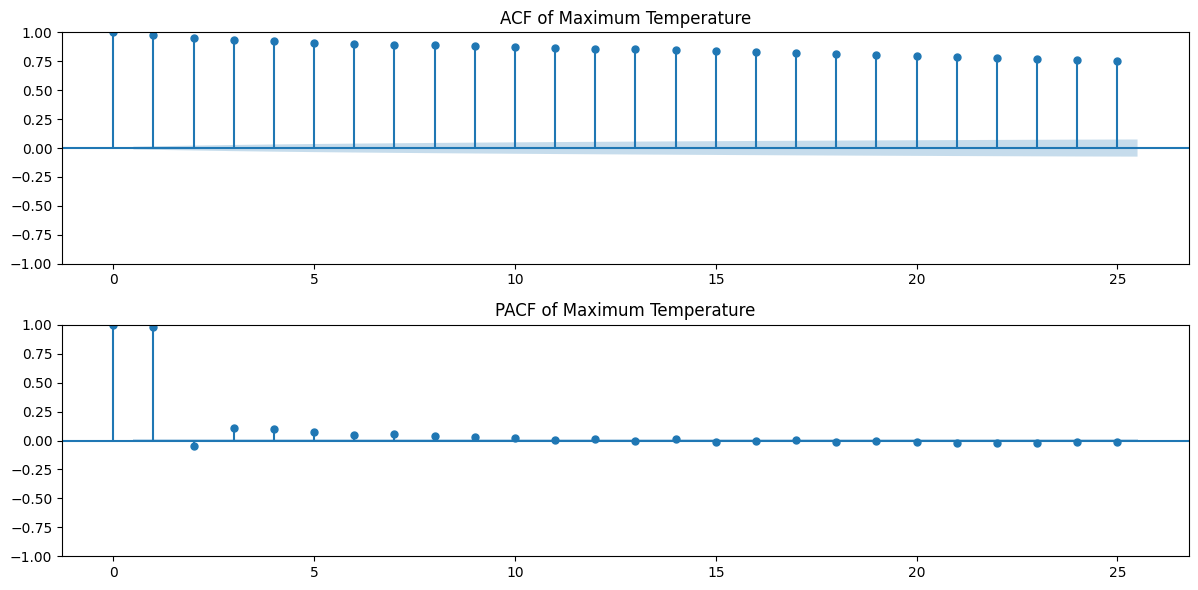

Maximum Temperature ADF Test:
ADF Statistic: -18.072159376725
p-value: 2.6021479907427788e-30
Critical Value (1%): -3.4306072863013926
Critical Value (5%): -2.861653712838046
Critical Value (10%): -2.5668305260044804
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=90112.903, Time=1.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=249411.732, Time=0.30 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.48 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=215561.516, Time=3.69 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=90045.035, Time=11.52 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=1.64 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=89040.580, Time=13.88 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=1.33 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=90042.835, Time=20.30 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=90089.585, Time=18.95 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=88940.848, Time=48.62 sec
 ARIMA(2,0,1)(

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


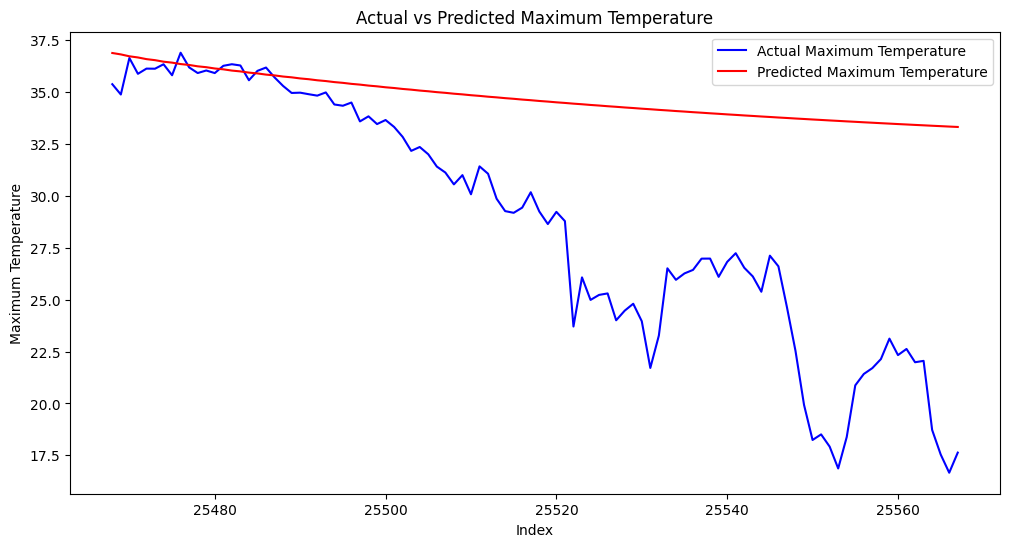

Mean of Maximum Temperature: 28.760867252600004
Root Mean Squared Error (RMSE): 7.8171564780166145


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Load the CSV file
file_path = '/content/delhi-temp-rains.csv'
df = pd.read_csv(file_path)

# Clean the data
df.columns = ['date', 'unnamed1', 'maximum_temperature', 'minimum_temperature']
df = df[['date', 'maximum_temperature', 'minimum_temperature']]


# Use only the maximum_temperature for ARIMA model
data = df['maximum_temperature']

# Split the data into training and testing sets
train_data, test_data = data[:-100], data[-100:]


# Plot ACF and PACF
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plot_acf(train_data, lags=25, ax=plt.gca(), title='ACF of Maximum Temperature')

plt.subplot(2, 1, 2)
plot_pacf(train_data, lags=25, ax=plt.gca(), title='PACF of Maximum Temperature')

plt.tight_layout()
plt.show()

# Check for stationarity using the Augmented Dickey-Fuller test
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    for key, value in result[4].items():
        print('Critical Value ({}): {}'.format(key, value))

print('Maximum Temperature ADF Test:')
adf_test(train_data)

# Determine the optimal order for ARIMA model
stepwise_fit = auto_arima(train_data, start_p=1, start_q=1,
                          max_p=3, max_q=3, seasonal=False,
                          trace=True, error_action='ignore',
                          suppress_warnings=True, stepwise=True)

# Print the summary of the best model
print(stepwise_fit.summary())

# Get the optimal order
order = stepwise_fit.order

# Train the ARIMA model
model = ARIMA(train_data, order=order)
model_fit = model.fit()

# Make predictions on the test set
start = len(train_data)
end = len(train_data) + len(test_data) - 1
predictions = model_fit.predict(start=start, end=end, typ='levels')

# Compare predictions with actual values
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data, label='Actual Maximum Temperature', color='blue')
plt.plot(test_data.index, predictions, label='Predicted Maximum Temperature', color='red')
plt.xlabel('Index')
plt.ylabel('Maximum Temperature')
plt.title('Actual vs Predicted Maximum Temperature')
plt.legend()
plt.show()

# Calculate the mean and RMSE of the maximum temperatures
mean_max_temp = np.mean(test_data)
rmse = np.sqrt(mean_squared_error(test_data, predictions))

# Print the mean and RMSE
print(f'Mean of Maximum Temperature: {mean_max_temp}')
print(f'Root Mean Squared Error (RMSE): {rmse}')


Since RMSE is less than the mean, this model is acceptable for predictions.

In [3]:
relative_rmse_Arima =  7.8171564780166145*100/28.760867252600004
print(f'RRMSE using ARIMA is {relative_rmse_Arima}%')

RRMSE using ARIMA is 27.179835744730326%


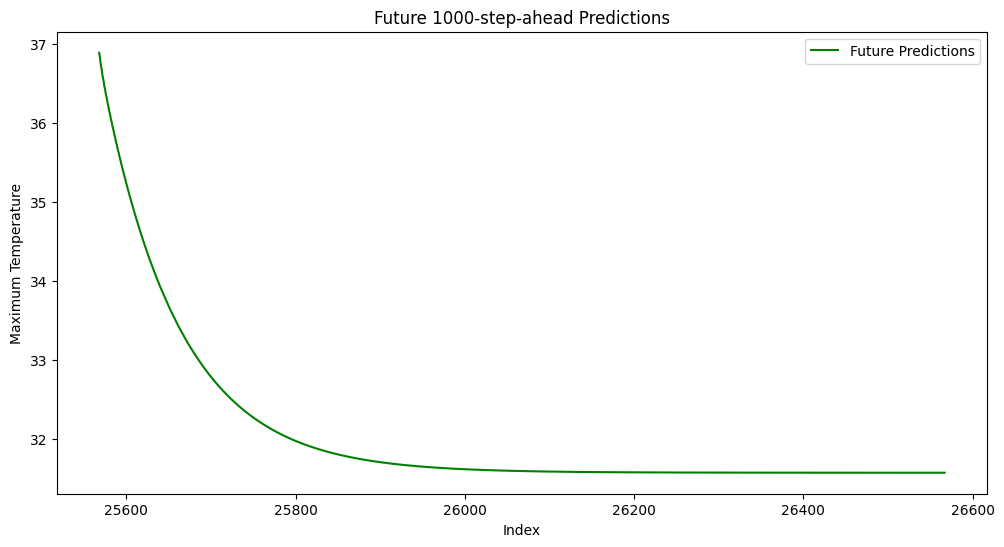

In [ ]:
#making future predictions
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np
future_predictions = model_fit.forecast(steps=1000)

# Plot the future predictions
plt.figure(figsize=(12, 6))
plt.plot(range(len(data), len(data) + 1000), future_predictions, label='Future Predictions', color='green')
plt.xlabel('Index')
plt.ylabel('Maximum Temperature')
plt.title('Future 1000-step-ahead Predictions')
plt.legend()
plt.show()

Random Forest Reressor Model and Linear Regressor Model

        Month  Price
0  1992-01-01   3459
1  1992-02-01   3458
2  1992-03-01   4002
3  1992-04-01   4564
4  1992-05-01   4221


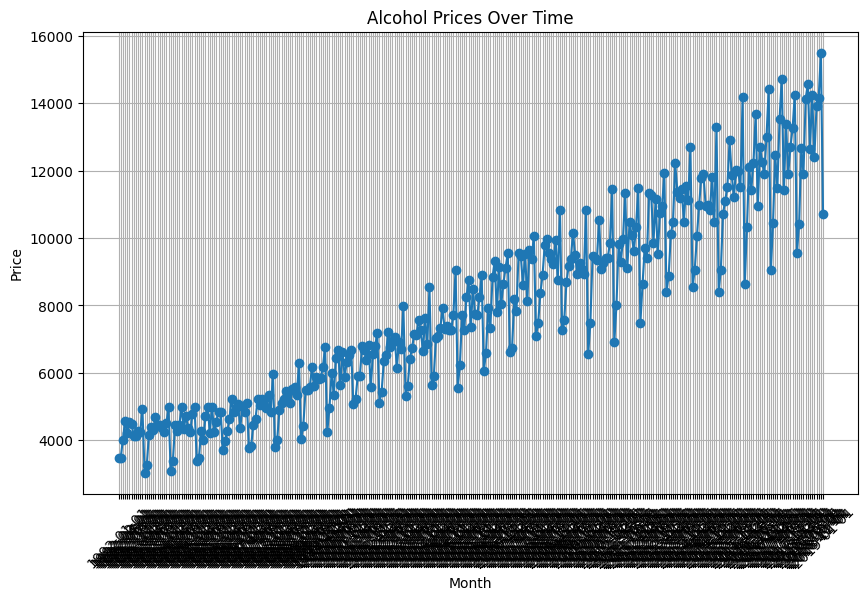

Linear Regression RMSE: 1918.048525132985
Random Forest RMSE: 2378.5306157948303
12641.45


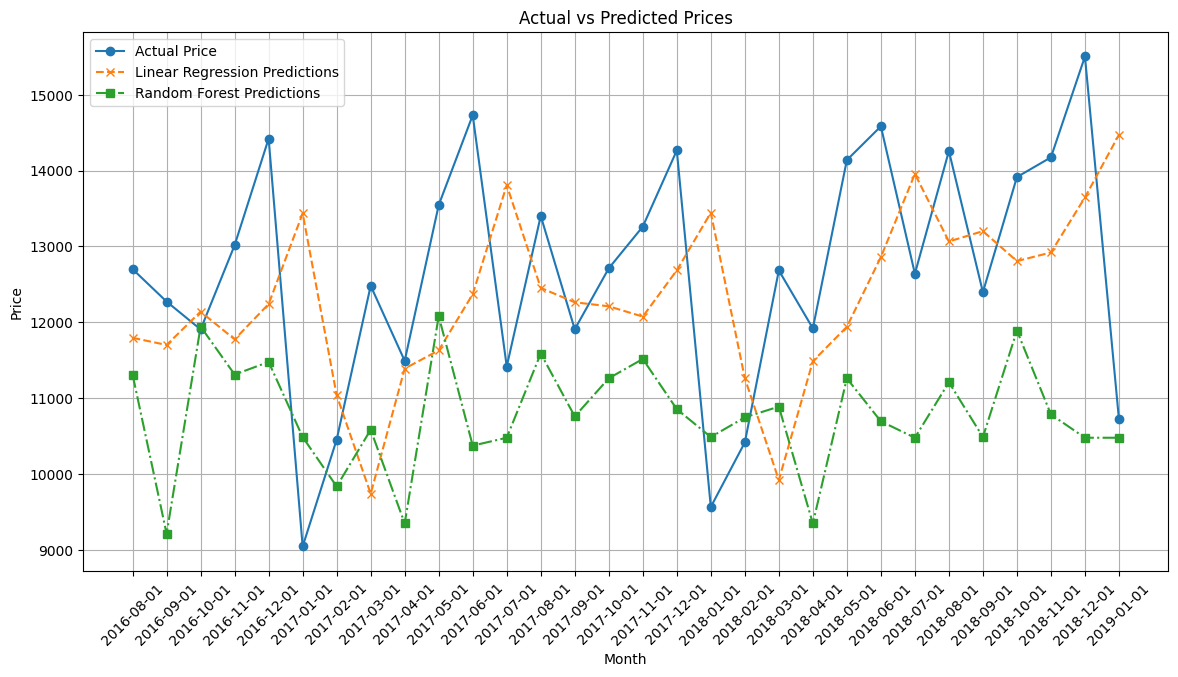

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the CSV file
file_path = '/content/Alcohol_Sales.csv'
df = pd.read_csv(file_path)

df.columns = ['Month', 'Price']


# Display the first few rows to understand the structure
print(df.head())

# Plot the price of alcohol over time
plt.figure(figsize=(10, 6))
plt.plot(df['Month'], df['Price'], marker='o')
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('Alcohol Prices Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Create new columns for sales this month, previous month, and 2nd previous month
df['Sale_this_month'] = df['Price']
df['Sale_prev_month'] = df['Price'].shift(1)
df['Sale_2nd_prev_month'] = df['Price'].shift(2)

# Remove rows with NaN values
df.dropna(inplace=True)

# Prepare the feature matrix and target vector
X = df[['Sale_prev_month', 'Sale_2nd_prev_month']]
  y = df['Sale_this_month']

# Split the data into training and testing sets (last 30 months as the testing set)
train_size = len(df) - 30
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

# Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Compute the RMSE for both models
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_predictions))
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))

print(f'Linear Regression RMSE: {lr_rmse}')
print(f'Random Forest RMSE: {rf_rmse}')
print(np.mean(X_test))

# Compare predictions with actual values
plt.figure(figsize=(14, 7))
plt.plot(df['Month'].iloc[train_size:], y_test, marker='o', label='Actual Price')
plt.plot(df['Month'].iloc[train_size:], lr_predictions, marker='x', linestyle='--', label='Linear Regression Predictions')
plt.plot(df['Month'].iloc[train_size:], rf_predictions, marker='s', linestyle='-.', label='Random Forest Predictions')
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [4]:
RRMSE_LR = 1918.048525132985*100/12641.45
print(f'RRMSE for Linear Regression is {RRMSE_LR}%')
RRMSE_RF = 2378.5306157948303*100/12641.45
print(f'RRMSE for Random Forest is {RRMSE_RF}%')

RRMSE for Linear Regression is 15.172693995807323%
RRMSE for Random Forest is 18.815330644782286%


RMSE is way lesser than than the mean of the dataset.

Using LSTM

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv('/content/monthly_milk_production.csv',index_col='Date',parse_dates=True)
df.index.freq='MS'

In [ ]:
df.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


<Axes: xlabel='Date'>

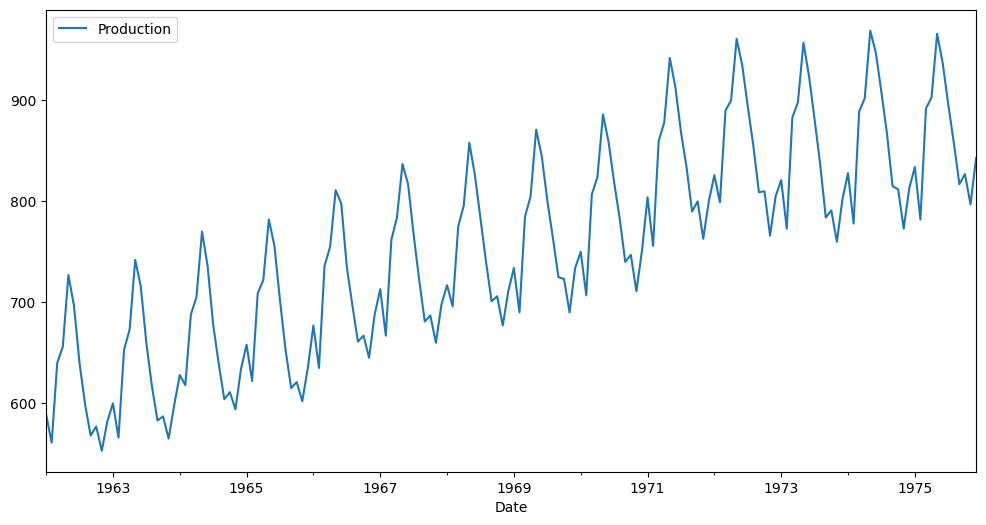

In [ ]:
df.plot(figsize=(12,6))

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

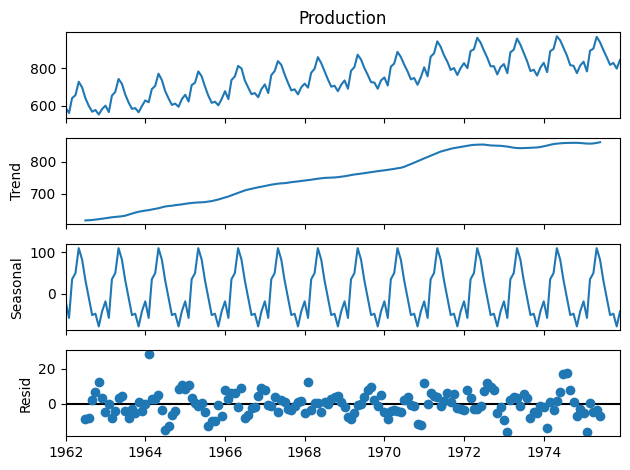

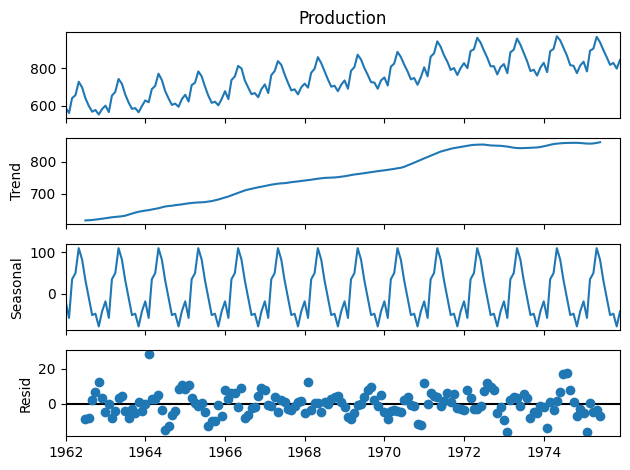

In [ ]:
results=seasonal_decompose(df['Production'])
results.plot()

In [ ]:
len(df)

168

In [ ]:
train=df.iloc[:156]
test=df.iloc[156:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [ ]:
df.head(),df.tail()

(            Production
 Date                  
 1962-01-01         589
 1962-02-01         561
 1962-03-01         640
 1962-04-01         656
 1962-05-01         727,
             Production
 Date                  
 1975-08-01         858
 1975-09-01         817
 1975-10-01         827
 1975-11-01         797
 1975-12-01         843)

In [ ]:
scaler.fit(train)
scaled_train=scaler.transform(train)
scaled_test=scaler.transform(test)

In [ ]:
scaled_train[:10]

array([[0.08653846],
       [0.01923077],
       [0.20913462],
       [0.24759615],
       [0.41826923],
       [0.34615385],
       [0.20913462],
       [0.11057692],
       [0.03605769],
       [0.05769231]])

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
#create batches of 3 inputs
n_input=3
n_features=1
generator=TimeseriesGenerator(scaled_train,scaled_train,length=n_input, batch_size=1)

In [ ]:
X,y=generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict \n{y}')

Given the Array: 
[0.08653846 0.01923077 0.20913462]
Predict 
[[0.24759615]]


In [ ]:
X.shape

(1, 3, 1)

In [ ]:
#Do the same, but for 12 months instead
n_input=12
generator=TimeseriesGenerator(scaled_train,scaled_train,length=n_input, batch_size=1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
#define model
model=Sequential()
model.add(LSTM(100,activation='relu',input_shape=(n_input,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse') # mse = mean square error.

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40901 (159.77 KB)
Trainable params: 40901 (159.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#fit model
model.fit(generator,epochs=50)

Epoch 1/50
144/144 [==============================] - 3s 9ms/step - loss: 0.0406
Epoch 2/50
144/144 [==============================] - 1s 9ms/step - loss: 0.0236
Epoch 3/50
144/144 [==============================] - 1s 9ms/step - loss: 0.0236
Epoch 4/50
144/144 [==============================] - 2s 16ms/step - loss: 0.0153
Epoch 5/50
144/144 [==============================] - 2s 16ms/step - loss: 0.0129
Epoch 6/50
144/144 [==============================] - 2s 11ms/step - loss: 0.0075
Epoch 7/50
144/144 [==============================] - 1s 9ms/step - loss: 0.0058
Epoch 8/50
144/144 [==============================] - 1s 9ms/step - loss: 0.0036
Epoch 9/50
144/144 [==============================] - 1s 9ms/step - loss: 0.0039
Epoch 10/50
144/144 [==============================] - 1s 9ms/step - loss: 0.0037
Epoch 11/50
144/144 [==============================] - 1s 9ms/step - loss: 0.0039
Epoch 12/50
144/144 [==============================] - 2s 16ms/step - loss: 0.0031
Epoch 13/50
144/144 [

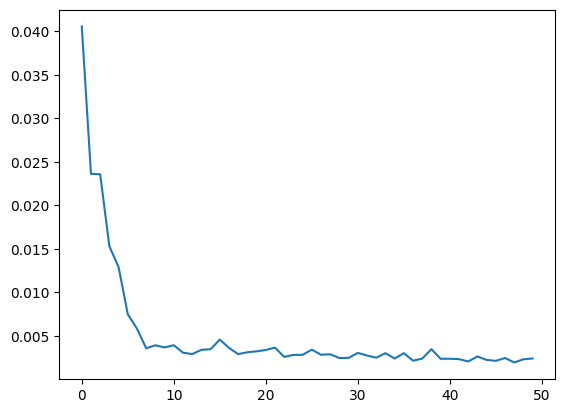

In [ ]:
loss_per_epoch=model.history.history['loss']
plt.plot(range(len(loss_per_epoch )),loss_per_epoch)

In [ ]:
last_train_batch = scaled_train[-12:]

In [ ]:
last_train_batch = last_train_batch.reshape((1,n_input,n_features))

In [ ]:
model.predict(last_train_batch)

1/1 [==============================] - 0s 303ms/step


array([[0.60816324]], dtype=float32)

In [ ]:
scaled_test[0]

array([0.67548077])

In [ ]:
test_predictions= []

first_eval_batch=scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1,n_input,n_features))

for i in range(len(test)):
  current_pred = model.predict(current_batch)[0]
  test_predictions.append(current_pred)
  current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)


1/1 [==============================] - 0s 46ms/step


In [ ]:
true_predictions=scaler.inverse_transform(test_predictions)


In [ ]:
test.loc[:, 'Predictions'] = true_predictions


<Axes: xlabel='Date'>

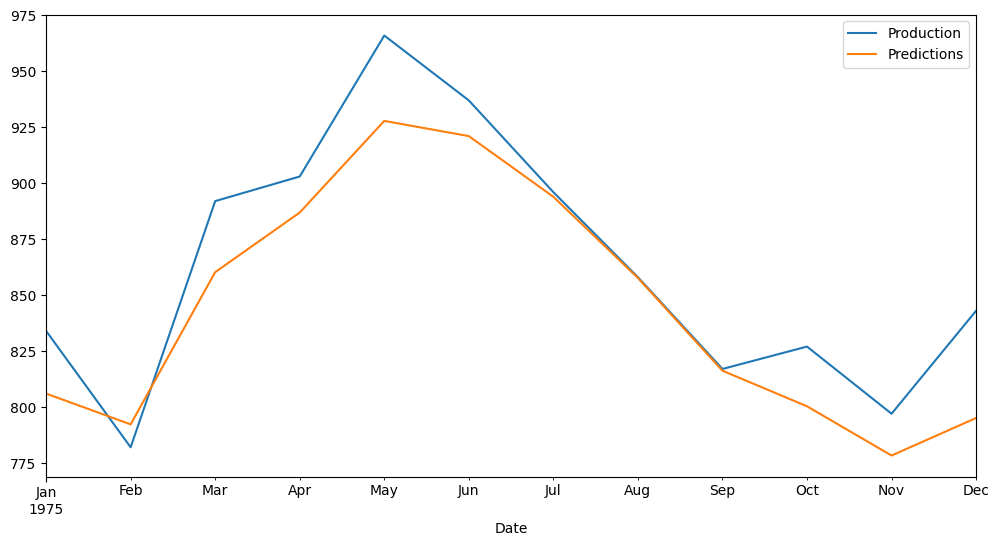

In [ ]:
test.plot(figsize=(12,6))

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
from math import sqrt
rmse=sqrt(mean_squared_error(test['Production'],test['Predictions']))
print(rmse)

24.541286154423872


In [ ]:
print(np.mean(df))

754.7083333333334


In [6]:
relative_rmse = 24.541286154423872/754.7083333333334 *100
print(f'RRMSE using LSTM is {relative_rmse}%')

RRMSE using LSTM is 3.2517576751845247%
